# Dilema do Prisioneiro
Fernando Vilela 2021421907

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def vizinhos(N):
  L=int(np.sqrt(N))
  viz = np.zeros((N,4),dtype=np.int32)
  for k in range(N):
    viz[k,0]=k+1
    if (k+1) % L == 0: 
      viz[k,0] = k+1-L
    viz[k,1] = k+L
    if k > (N-L-1): 
      viz[k,1] = k+L-N
    viz[k,2] = k-1
    if (k % L == 0): 
      viz[k,2] = k+L-1
    viz[k,3] = k-L
    if k < L: 
      viz[k,3] = k+N-L
  return viz

In [3]:
def calcula_densidade(L, Nmcs, b, k):
    N = L ** 2
    viz = vizinhos(N)
    
    # Estado inicial da população
    populacao = np.random.choice(['C', 'D'], N, replace=True)
    
    for _ in range(Nmcs):
        indRnd = np.random.randint(N)
        cooperadoresX = sum(populacao[i] == 'C' for i in viz[indRnd])
        
        Ex = cooperadoresX * b if populacao[indRnd] == 'D' else cooperadoresX + 1
        
        vizRnd = np.random.randint(4)
        vizInx = viz[indRnd][vizRnd]
        
        cooperadoresY = sum(populacao[i] == 'C' for i in viz[vizInx])
        
        Ey = cooperadoresY * b if populacao[vizInx] == 'D' else cooperadoresY + 1
        
        prob = np.random.random()
        w = 1 / (1 + np.exp(-(Ey - Ex) / k))
        
        if w > prob:
            populacao[indRnd] = populacao[vizInx]
    
    return populacao

In [4]:
def calcular_densidades_varios_bs(L, Nmcs, num_b, K):
    N = L ** 2
    bValues = np.linspace(1, 2, num_b)
    cList = np.zeros(num_b)
    
    for i, b in enumerate(bValues):
        pop = calcula_densidade(L, Nmcs, b, K)
        NumCooperadores = np.count_nonzero(pop == 'C')
        c = NumCooperadores / N
        cList[i] = c
    
    plot_densidade_por_valores_de_b(cList, bValues, Nmcs, K)

In [5]:
def plot_densidade_por_valores_de_b(cList, bValues, Nmcs, K):
    plt.title(f'Densidade de cooperadores depois de {Nmcs} iterações\n e com k = {K}')
    plt.xlabel('b - Tentação à deserção')
    plt.ylabel('Densidade de cooperadores')
    plt.plot(bValues, cList)
    plt.show()

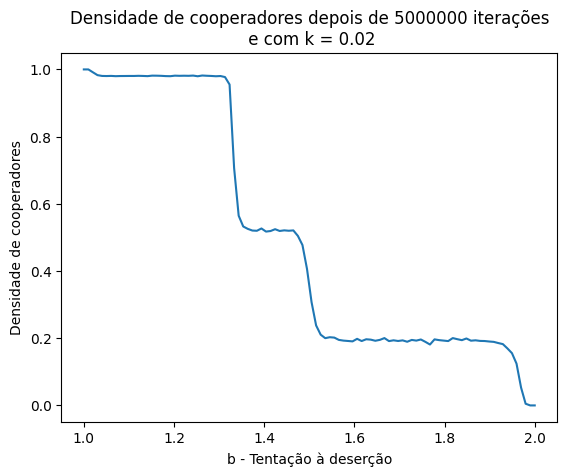

In [6]:
L = 200
Nmcs = 5000000
num_b = 100
K = 0.02
calcular_densidades_varios_bs(L, Nmcs, num_b, K)

Para **k=0.02**, b1 está aproximadamente em **1.2**, onde a densidade de cooperadores começa a diminuir significativamente de forma mais abrupta. Ja b2 está em torno de **1.9**, onde a densidade de cooperadores cai para valores próximos de zero.
Neste caso, a transição entre as fases de cooperação e deserção ocorre de forma mais nítida e abruptade forma que  o sistema é menos suscetível a flutuações e o comportamento coletivo é mais determinado pelos valores de b.

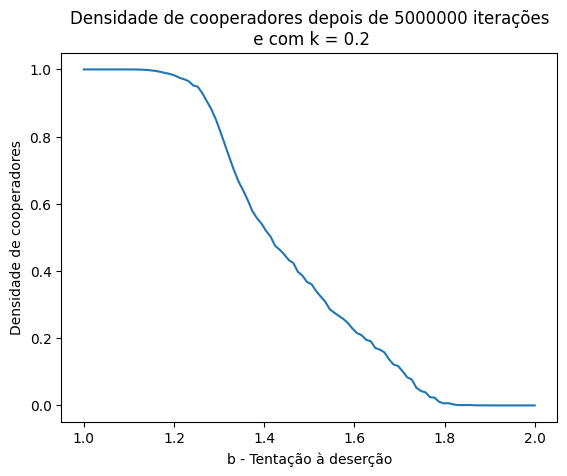

In [7]:
L = 200
Nmcs = 5000000
num_b = 100
K = 0.2
calcular_densidades_varios_bs(L, Nmcs, num_b, K)

Com **K = 0.2** b1  é aproximadamente **1.2** e o valor de b2 é aproximadamente **1.8**.

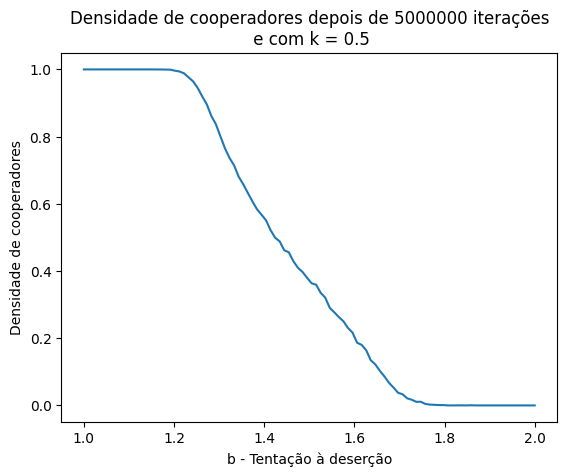

In [8]:
L = 200
Nmcs = 5000000
num_b = 100
K = 0.5
calcular_densidades_varios_bs(L, Nmcs, num_b, K)

Com **K = 0.5** b1  é aproximadamente **1.2** e o valor de b2 é aproximadamente **1.8**.